In [1]:
!nvidia-smi

Fri May 26 22:51:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics 
#==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="TCEd0M8cNgbjG3ppH5z6")
project = rf.workspace("florencia").project("handgun-tht78")
dataset = project.version(1).download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.109, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Handgun-1 in yolov8:: 100%|██████████| 4399/4399 [00:01<00:00, 4073.70it/s]


In [6]:
!yolo help

WARNING ⚠️ '--help' does not require leading dashes '--', updating to 'help'.

    Arguments received: ['yolo', '--help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/Zgi9g1ksQHc' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and 

In [7]:
!yolo cfg

Printing '/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/default.yaml'

task: detect
mode: train
model: null
data: null
epochs: 100
patience: 50
batch: 16
imgsz: 640
save: true
save_period: -1
cache: false
device: null
workers: 8
project: null
name: null
exist_ok: false
pretrained: false
optimizer: SGD
verbose: true
seed: 0
deterministic: true
single_cls: false
rect: false
cos_lr: false
close_mosaic: 0
resume: false
amp: true
overlap_mask: true
mask_ratio: 4
dropout: 0.0
val: true
split: val
save_json: false
save_hybrid: false
conf: null
iou: 0.7
max_det: 300
half: false
dnn: false
plots: true
source: null
show: false
save_txt: false
save_conf: false
save_crop: false
show_labels: true
show_conf: true
vid_stride: 1
line_width: null
visualize: false
augment: false
agnostic_nms: false
classes: null
retina_masks: false
boxes: true
format: torchscript
keras: false
optimize: false
int8: false
dynamic: false
simplify: false
opset: null
workspace: 4
nms: false
lr0: 0.01
lrf: 0.01

In [8]:
%cd {HOME}
epoch_num = 10

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs={epoch_num} imgsz=800 plots=True save_period={int(epoch_num/2)}

/content
100% 21.5M/21.5M [00:01<00:00, 15.1MB/s]
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Handgun-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

/content


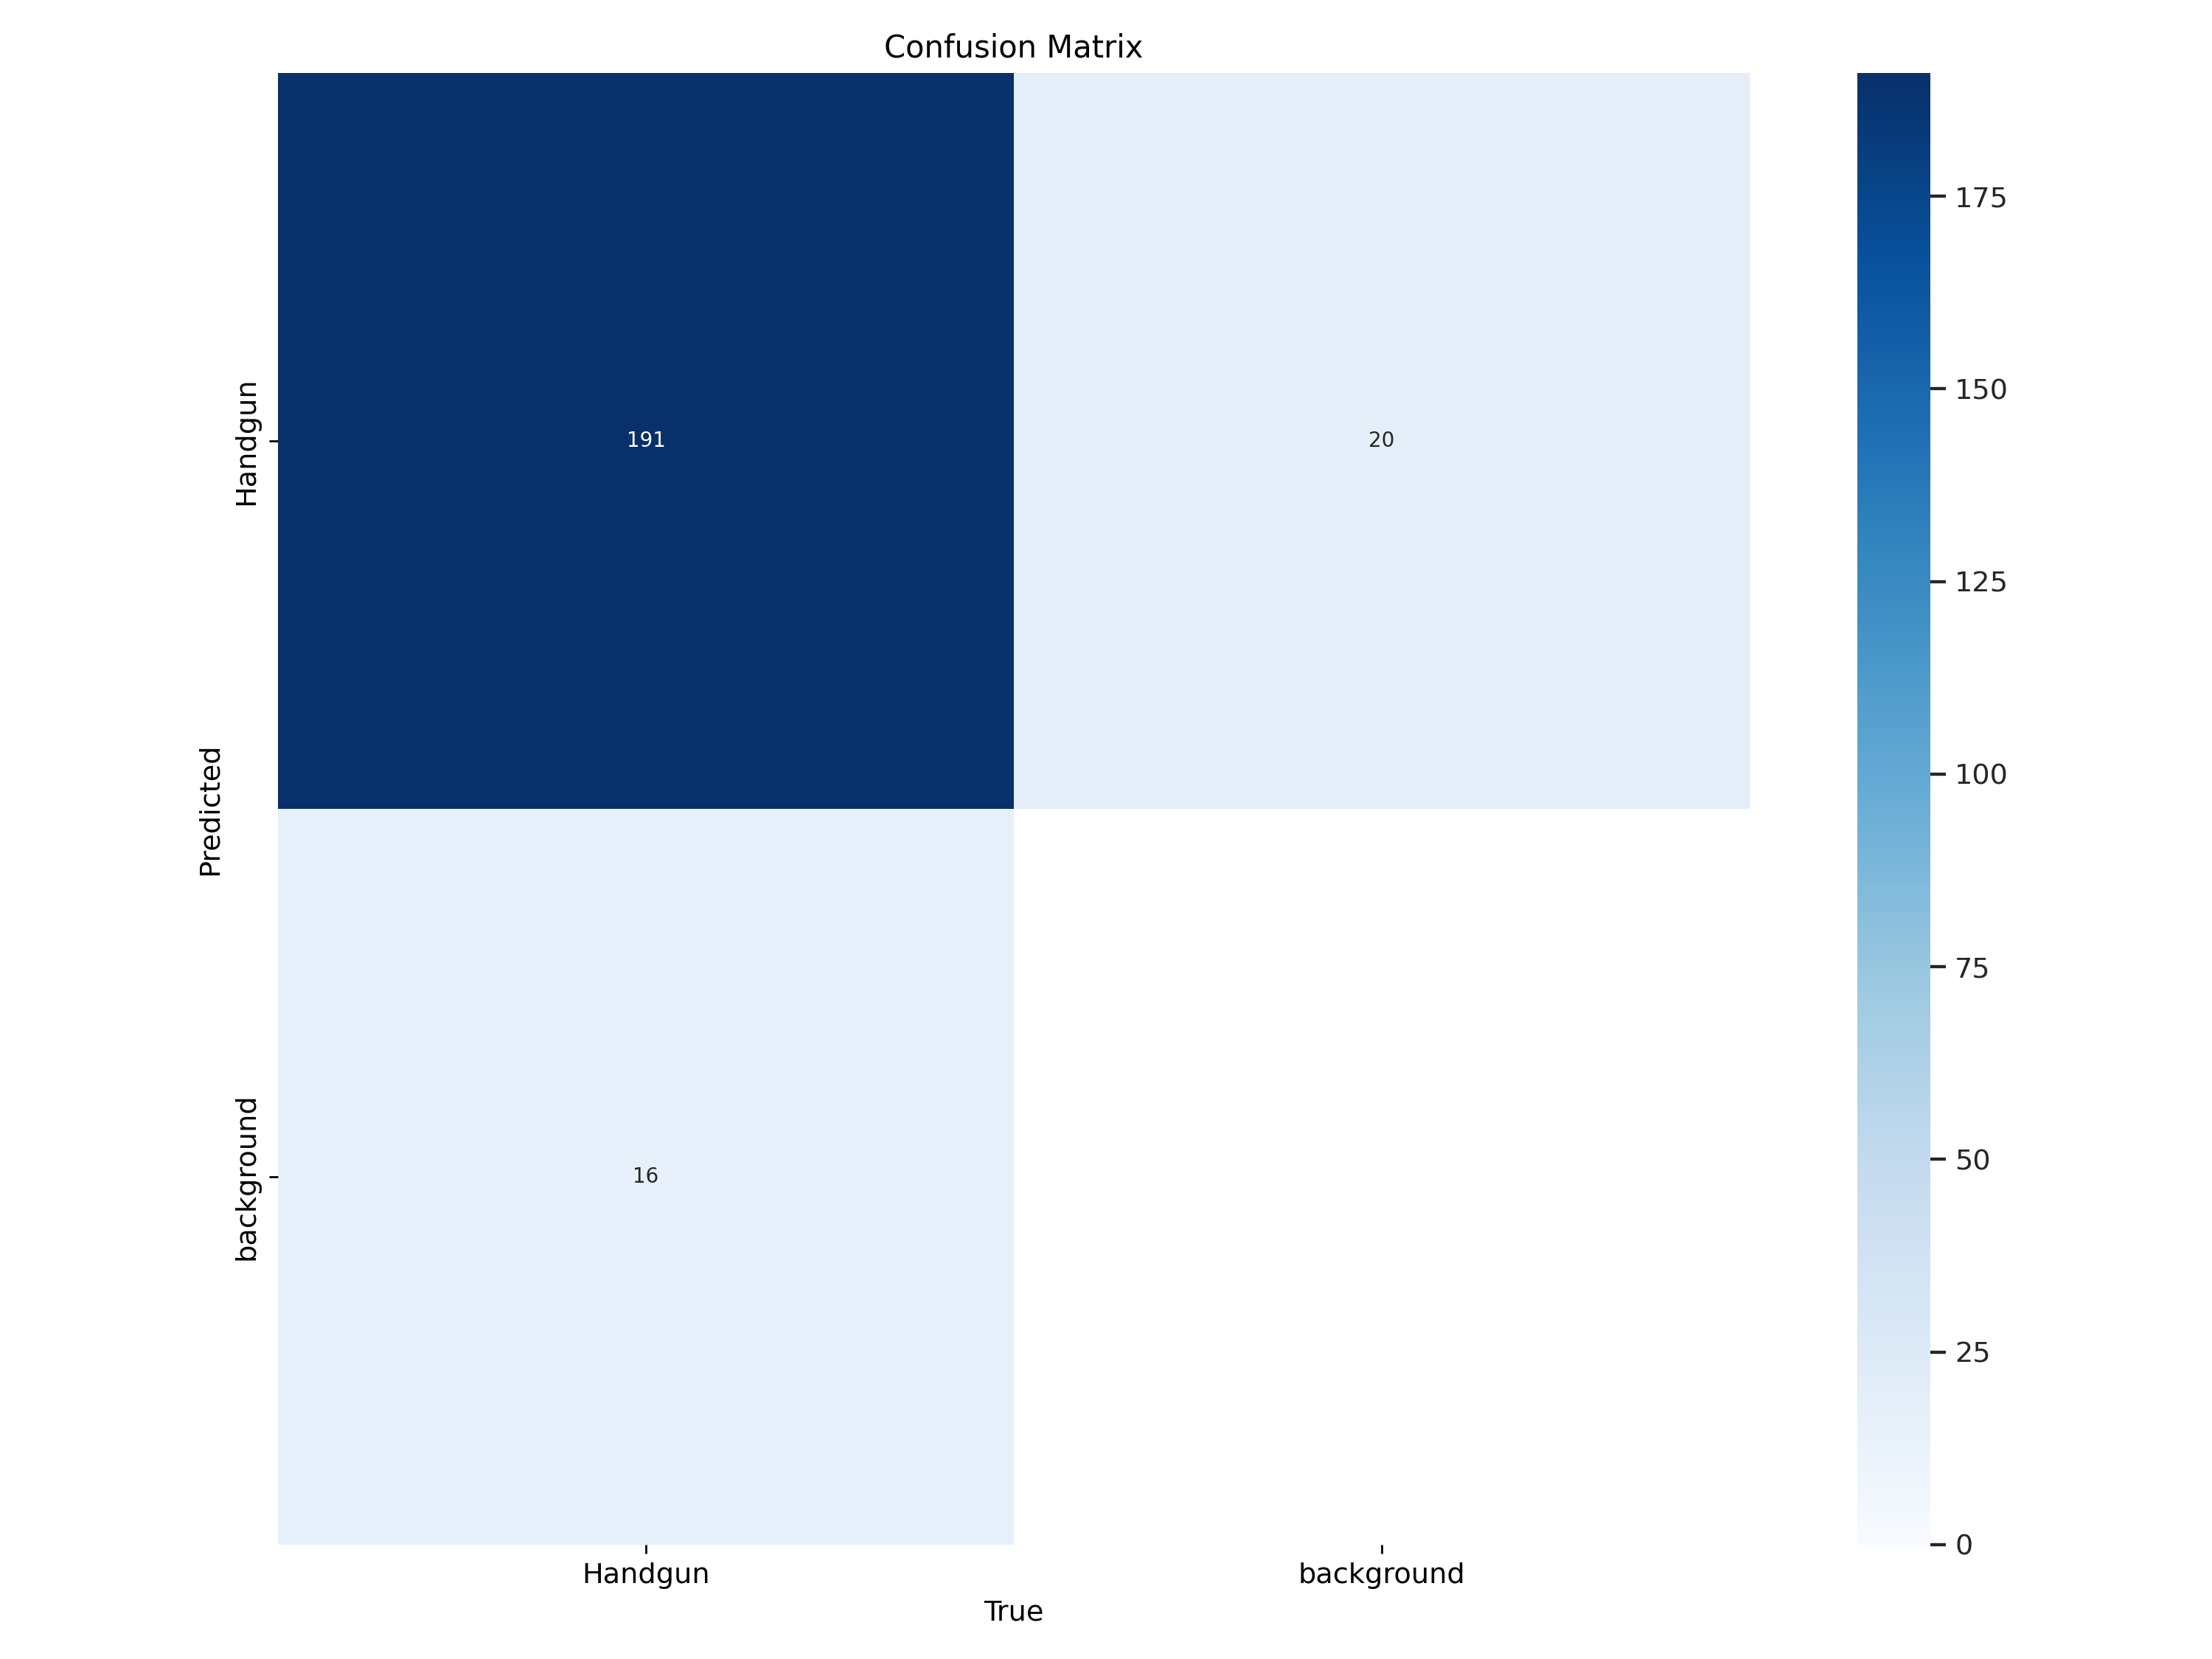

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


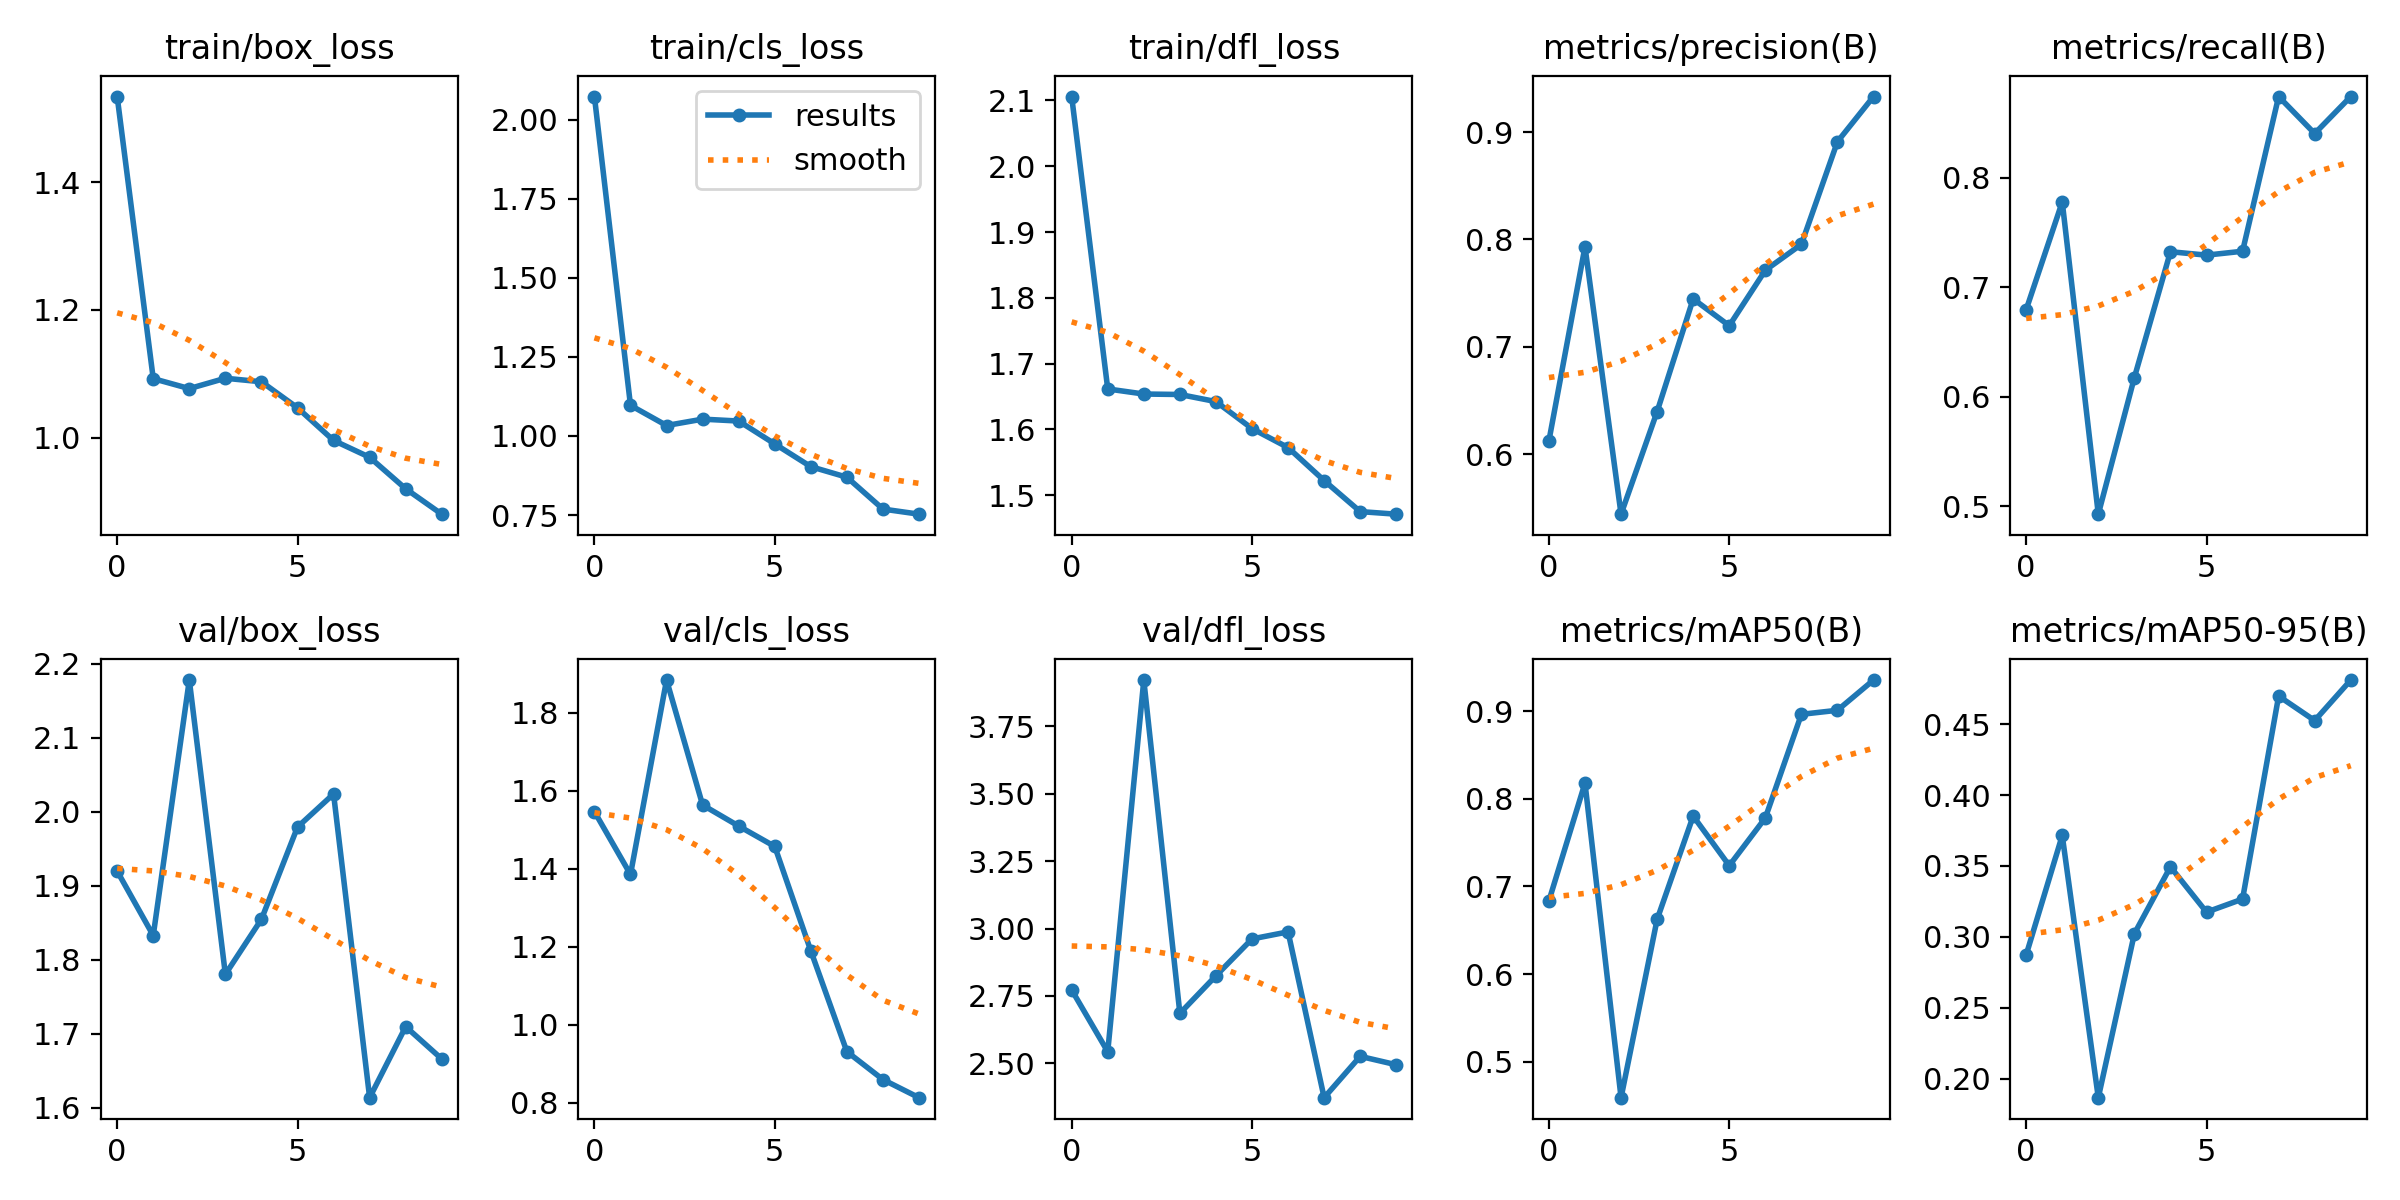

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


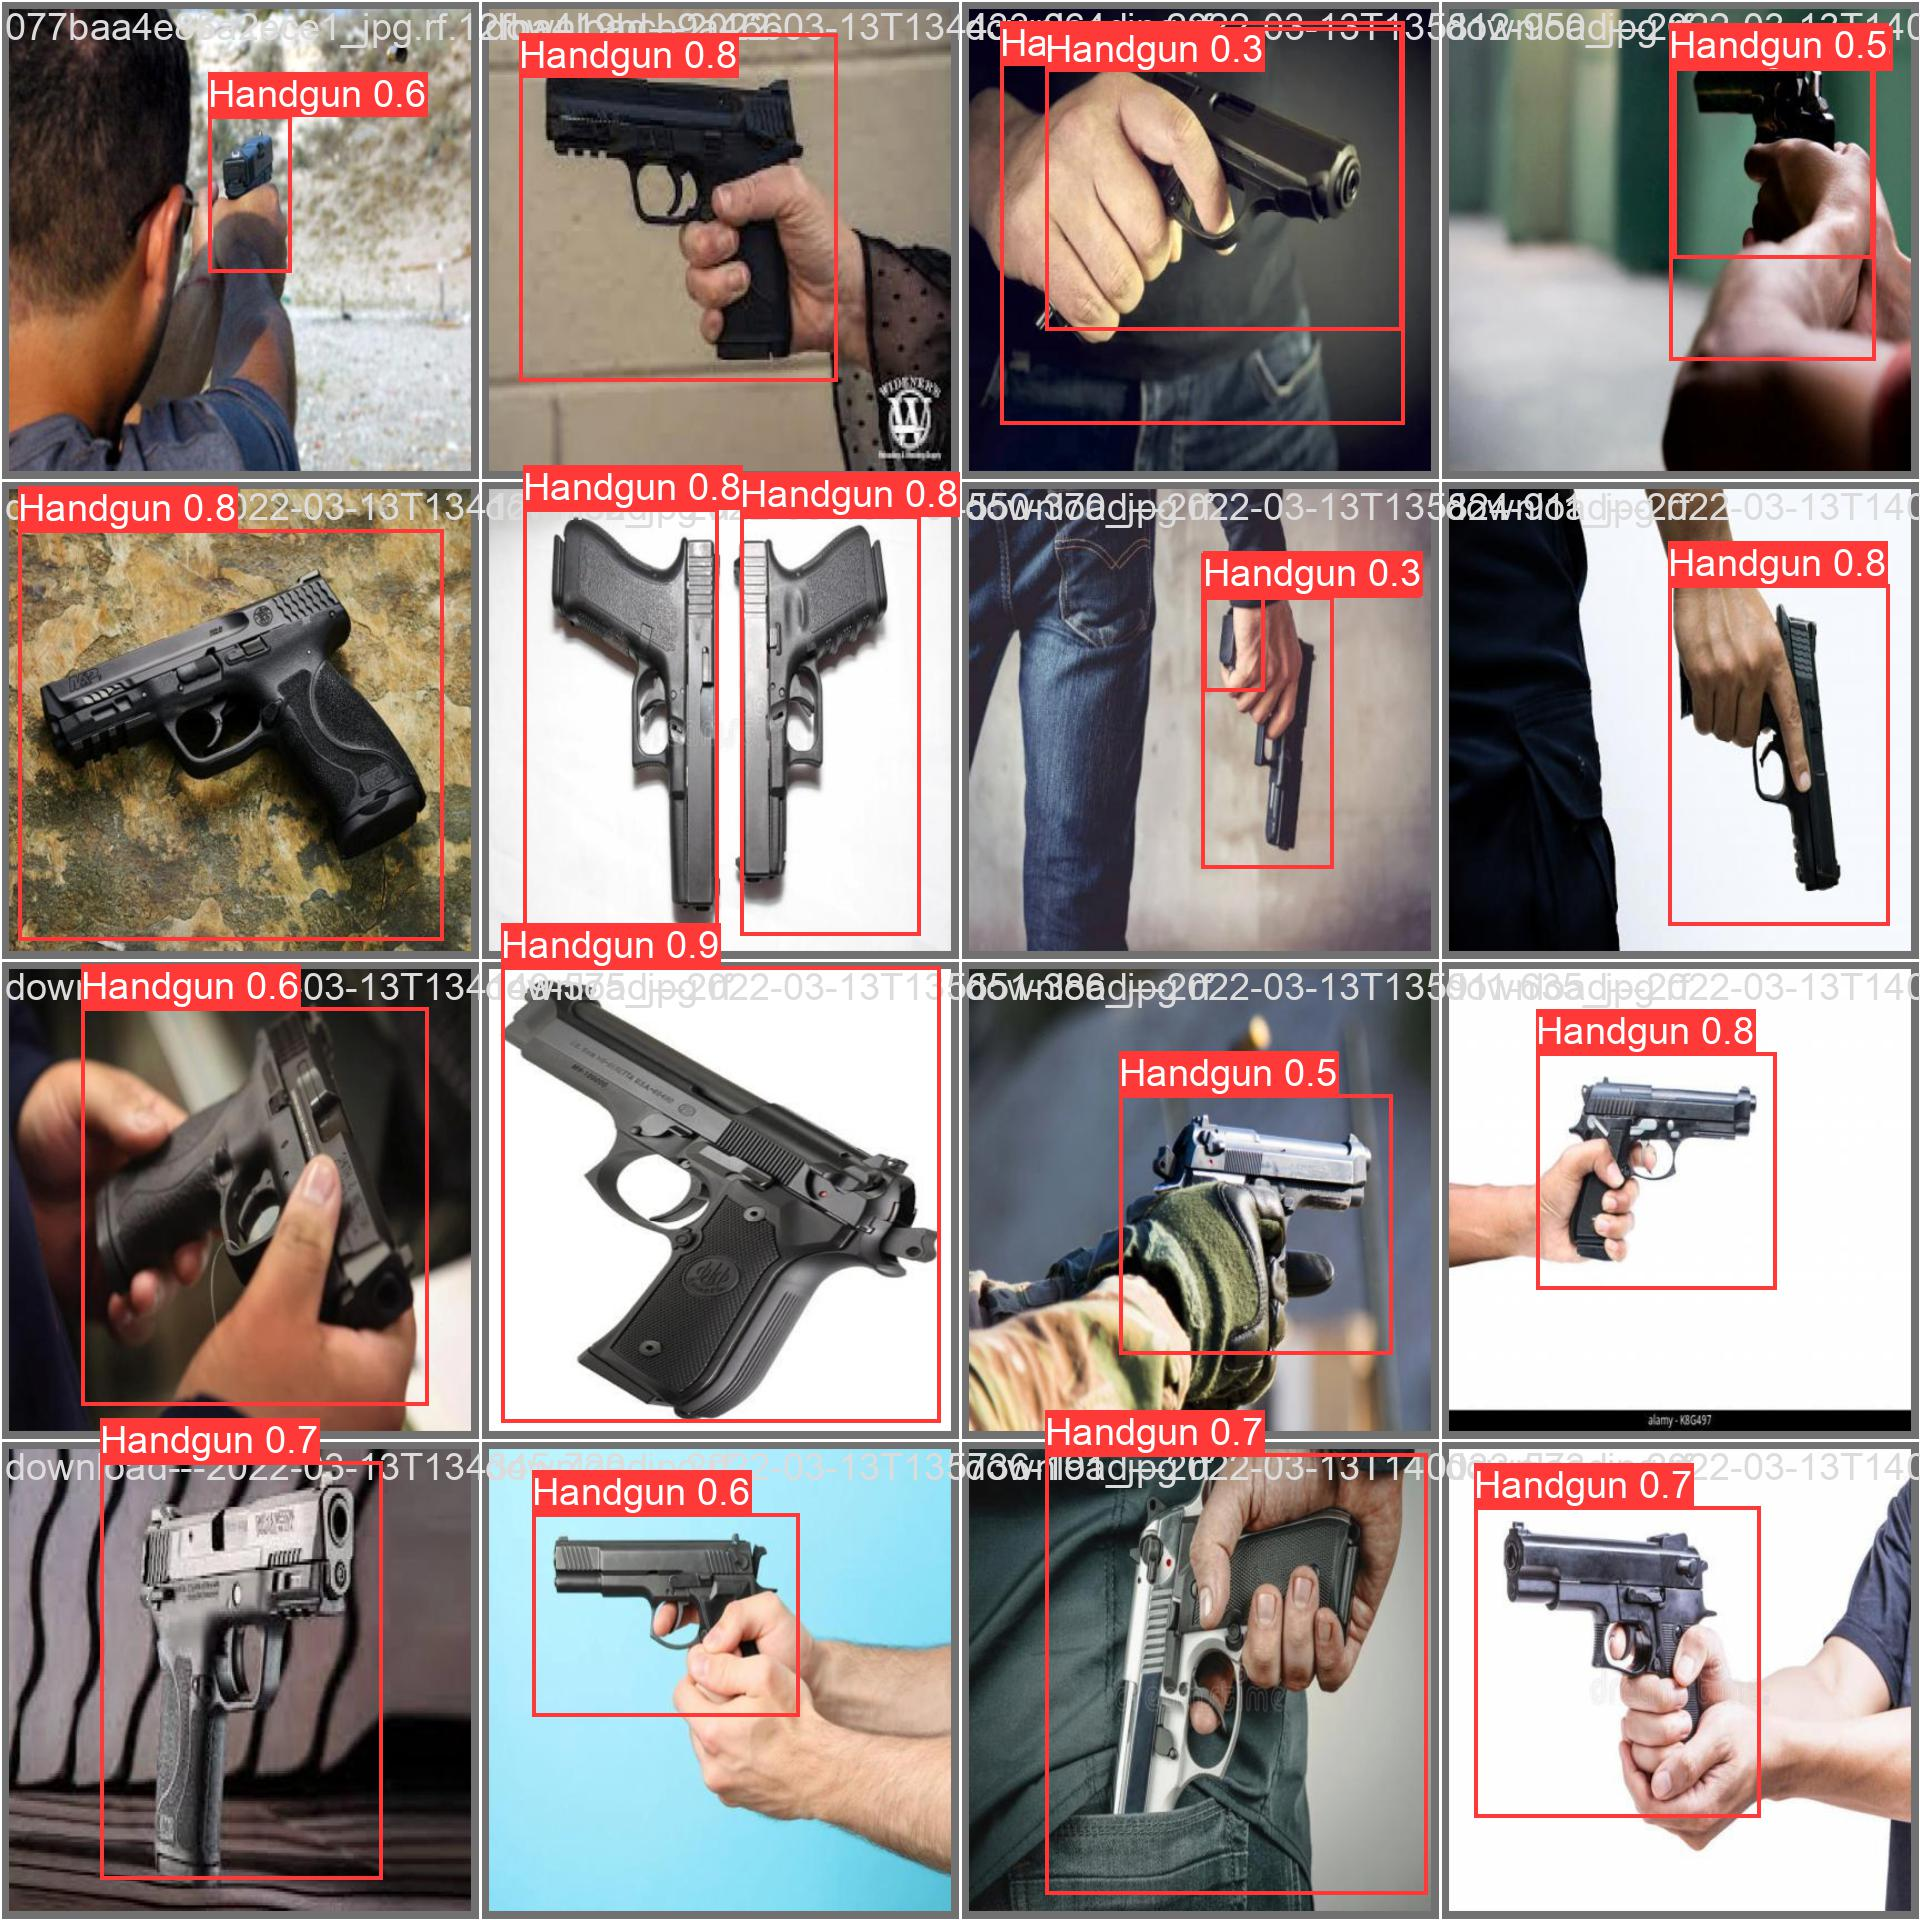

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/Handgun-1/valid/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100% 183/183 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:07<00:00,  1.68it/s]
                   all        183        207      0.934      0.874      0.935      0.481
Speed: 1.2ms preprocess, 17.6ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val


In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/91 /content/datasets/Handgun-1/test/images/0602cd5998096480_jpg.rf.b3da0af24805f022cb3f054e0865da70.jpg: 800x800 4 Handguns, 24.7ms
image 2/91 /content/datasets/Handgun-1/test/images/06f860c6e7b5559f_jpg.rf.217d47f01d84cbce31d1d833c48361c7.jpg: 800x800 3 Handguns, 24.7ms
image 3/91 /content/datasets/Handgun-1/test/images/197aaf18b6f41f51_jpg.rf.7dc25a4229faa7186c436242993414ce.jpg: 800x800 1 Handgun, 24.6ms
image 4/91 /content/datasets/Handgun-1/test/images/1cdb986cd69f46f5_jpg.rf.82d1a9253782bd6b2345d2ebf0009f43.jpg: 800x800 1 Handgun, 24.6ms
image 5/91 /content/datasets/Handgun-1/test/images/1db3abae5f8b29d7_jpg.rf.3f7e1288247688174eb9e935e8544a96.jpg: 800x800 3 Handguns, 24.6ms
image 6/91 /content/datasets/Handgun-1/test/images/26f50b38c60ea2d9_jpg.rf.929b83124cb63cb97d86801602f70f7d.jpg: 800x800 1 Handgun, 24.6

**NOTE:** Let's take a look at few results.

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [15]:
!zip -r export.zip {HOME}/runs/detect/train/*

  adding: content/runs/detect/train/args.yaml (deflated 51%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 36%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 39%)
  adding: content/runs/detect/train/events.out.tfevents.1685141567.6e757cd71ed9.1232.0 (deflated 72%)
  adding: content/runs/detect/train/F1_curve.png (deflated 16%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 42%)
  adding: content/runs/detect/train/labels.jpg (deflated 32%)
  adding: content/runs/detect/train/P_curve.png (deflated 18%)
  adding: content/runs/detect/train/PR_curve.png (deflated 24%)
  adding: content/runs/detect/train/R_curve.png (deflated 16%)
  adding: content/runs/detect/train/results.csv (deflated 81%)
  adding: content/runs/detect/train/results.png (deflated 6%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 4%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 5%)
  adding: content/runs/detect/tra

In [16]:
from google.colab import files
files.download('export.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>